Initial table, without any deletions:

In [2]:
import pandas as pd


dataframe = pd.read_csv("Titanic.csv")

print(dataframe)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Table after dropping NaNs, except Sex and Embarked, they're converted into float values:

In [3]:
init_rows = len(dataframe)
print(f'Initial rows: {init_rows}')

dataframe.dropna(axis=0, how='any', inplace=True)
delete_list = []
ignore_delete = ['Sex', 'Embarked']
for column in dataframe:
    try:
        float(dataframe[column][1])
    except ValueError:
        if column in ignore_delete:
            continue
        delete_list.append(column)
delete_list.append('PassengerId')
dataframe.drop(delete_list, axis=1, inplace=True)

convert_sex = {'male': 0, 'female': 1}
convert_embarked = {'C': 1, 'Q': 2, 'S': 3}

for key in convert_sex:
    dataframe.replace(key, convert_sex[key], inplace=True)
for key in convert_embarked:
    dataframe.replace(key, convert_embarked[key], inplace=True)

print(dataframe)

print(f'Rows after dropping: {len(dataframe)}\nDropped rows percent: {(init_rows - len(dataframe))/init_rows*100:.2f}')

Initial rows: 891
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1           1       1    1  38.0      1      0  71.2833         1
3           1       1    1  35.0      1      0  53.1000         3
6           0       1    0  54.0      0      0  51.8625         3
10          1       3    1   4.0      1      1  16.7000         3
11          1       1    1  58.0      0      0  26.5500         3
..        ...     ...  ...   ...    ...    ...      ...       ...
871         1       1    1  47.0      1      1  52.5542         3
872         0       1    0  33.0      0      0   5.0000         3
879         1       1    1  56.0      0      1  83.1583         1
887         1       1    1  19.0      0      0  30.0000         3
889         1       1    0  26.0      0      0  30.0000         1

[183 rows x 8 columns]
Rows after dropping: 183
Dropped rows percent: 79.46


C:\Users\User\AppData\Local\Temp\ipykernel_1992\1453642511.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(key, convert_sex[key], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1992\1453642511.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(key, convert_embarked[key], inplace=True)


Preparing data for model training, creating separate data with Embarked column and without

In [4]:
from sklearn.model_selection import train_test_split

dataframe_no_embarked = dataframe.drop('Embarked', axis=1)

data_x = dataframe.drop("Survived", axis=1)
data_y = dataframe["Survived"]

data_ne_x = dataframe_no_embarked.drop("Survived", axis=1)
data_ne_y = dataframe_no_embarked["Survived"]

data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.3)
data_ne_x_train, data_ne_x_test, data_ne_y_train, data_ne_y_test = train_test_split(data_ne_x, data_ne_y, test_size=0.3)

Model training and testing

In [5]:
from sklearn.linear_model import LogisticRegression

clf_with_embarked = LogisticRegression(random_state=0, max_iter=200)
clf_with_embarked.fit(data_x_train, data_y_train)

clf_without_embarked = LogisticRegression(random_state=0, max_iter=200)
clf_without_embarked.fit(data_ne_x_train, data_ne_y_train)

embarked_pred = clf_with_embarked.predict(data_x_test)
no_embarked_pred = clf_without_embarked.predict(data_ne_x_test)

embarked_accuracy = clf_with_embarked.score(data_x_test, data_y_test)
no_embarked_accuracy = clf_without_embarked.score(data_ne_x_test, data_ne_y_test)

print(f"With Embarked accuracy: {embarked_accuracy:.2f}")
print(f"Without Embarked accuracy: {no_embarked_accuracy:.2f}")

With Embarked accuracy: 0.76
Without Embarked accuracy: 0.84


Metrics for Part3

In [6]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, auc

embarked_precision = precision_score(data_y_test, embarked_pred)
no_embarked_precision = precision_score(data_ne_y_test, no_embarked_pred)

embarked_recall = recall_score(data_y_test, embarked_pred)
no_embarked_recall = recall_score(data_ne_y_test, no_embarked_pred)

embarked_f1 = f1_score(data_y_test, embarked_pred)
no_embarked_f1 = f1_score(data_ne_y_test, no_embarked_pred)

embarked_cm = confusion_matrix(data_y_test, embarked_pred)
no_embarked_cm = confusion_matrix(data_ne_y_test, no_embarked_pred)

embarked_decision = clf_with_embarked.decision_function(data_x_test)
no_embarked_decision = clf_without_embarked.decision_function(data_ne_x_test)

embarked_prec_curve, embarked_rec_curve, _ = precision_recall_curve(data_y_test, y_score=embarked_decision)
no_embarked_prec_curve, no_embarked_rec_curve, _ = precision_recall_curve(data_ne_y_test, y_score=no_embarked_decision)

embarked_fpr, embarked_tpr, _ = roc_curve(data_y_test, y_score=embarked_decision)
no_embarked_fpr, no_embarked_tpr, _ = roc_curve(data_ne_y_test, y_score=no_embarked_decision)

embarked_auc = auc(embarked_fpr, embarked_tpr)
no_embarked_auc = auc(no_embarked_fpr, no_embarked_tpr)

print("Embarked stats:")
print(f"Precision: {embarked_precision:.2f}")
print(f"Recall: {embarked_recall:.2f}")
print(f"F1: {embarked_f1:.2f}")

print("No Embarked stats:")
print(f"Precision: {no_embarked_precision:.2f}")
print(f"Recall: {no_embarked_recall:.2f}")
print(f"F1: {no_embarked_f1:.2f}")

Embarked stats:
Precision: 0.83
Recall: 0.81
F1: 0.82
No Embarked stats:
Precision: 0.84
Recall: 0.95
F1: 0.89


Displaying confusion matrices

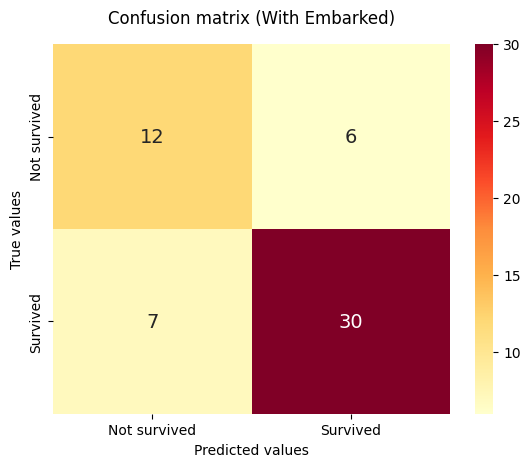

In [7]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np

seaborn.heatmap(embarked_cm, annot=True, fmt='d', cmap='YlOrRd', annot_kws={'fontsize': 14})
plt.title('Confusion matrix (With Embarked)', pad=15)
plt.xlabel('Predicted values')
plt.ylabel('True values')

classes = ["Not survived", "Survived"]
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.show()

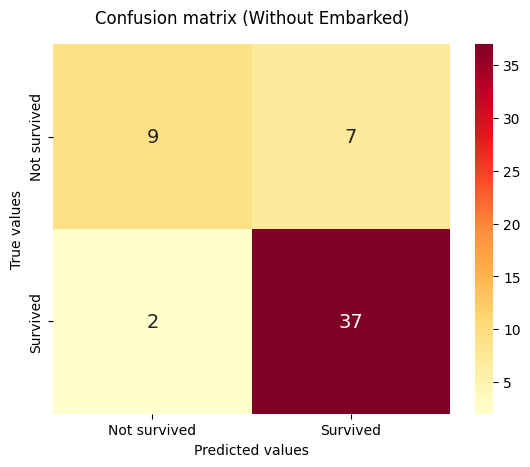

In [8]:
seaborn.heatmap(no_embarked_cm, annot=True, fmt='d', cmap='YlOrRd', annot_kws={'fontsize': 14})
plt.title('Confusion matrix (Without Embarked)', pad=15)
plt.xlabel('Predicted values')
plt.ylabel('True values')

classes = ["Not survived", "Survived"]
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.show()

Plotting PR curves

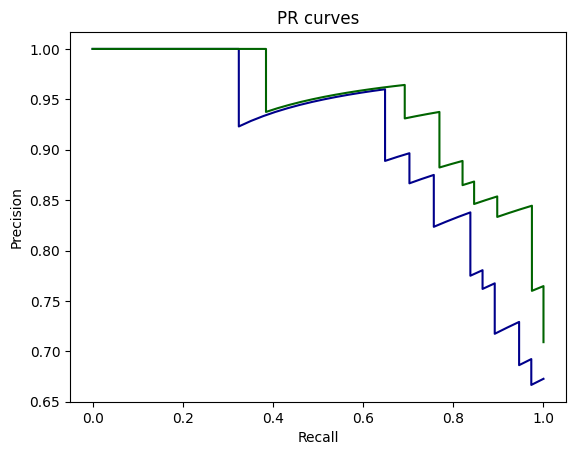

In [13]:
plt.plot(embarked_rec_curve, embarked_prec_curve, color='darkblue', label=f'Embarked')
plt.plot(no_embarked_rec_curve, no_embarked_prec_curve, color='darkgreen', label=f'No Embarked')
plt.title('PR curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Plotting ROC curves

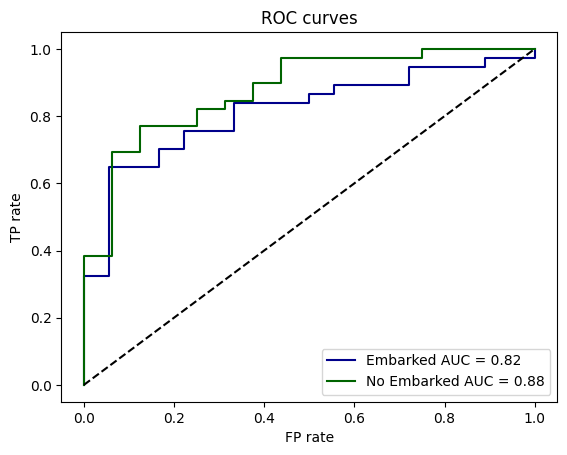

In [14]:
plt.plot(embarked_fpr, embarked_tpr, color='darkblue', label=f'Embarked AUC = {embarked_auc:.2f}')
plt.plot(no_embarked_fpr, no_embarked_tpr, color='darkgreen', label=f'No Embarked AUC = {no_embarked_auc:.2f}')
# Reference line
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC curves')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.legend()
plt.show()